In [ ]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade.cti import lesCreateImage as lcm
from pyCascade.cti import lesCreateMovie as vcm
import os
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)

In [ ]:
R = 33
config = 3
relRunFolder = f"CHARLES/config{config}/R{R}"

image_path = f"{scratch_dir}/{relRunFolder}/Images/mean_u_y1p5.00010000.png"
output_dir = f"{home_dir}/{relRunFolder}/Images/python_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
image_name = os.path.basename(image_path)

varlist=['planar']
cmaplist=['plasma']
data_min=[0]
data_max=[4]

# Process the image
image = vcm.process_image(image_path, varlist, cmaplist, data_min, data_max)

# Example usage of the reusable function
custom_output = os.path.join(output_dir, image_name)
result = lcm.create_image_with_colorbar(
    image, custom_output, cmaplist, data_min, data_max, 
    cbar_title="Velocity (m/s)",
    cbar_orient="vertical"
)

# Display the result
plt.figure(figsize=(12, 10))
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"{image_name}")
plt.show()

KeyboardInterrupt: 

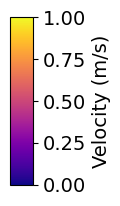

In [18]:
def collect_image_averages(
    image_name,
    varlist=['planar'], cmaplist=['plasma'], data_min=[0], data_maxs=[[2], [4], [2], [4]], crop = None, rotate = 0,
    runs = {
        2: {
            "diagonal": [53, 54],# 46, 47],
            "parallel": [55, 56],# 55, 49],
        },
        3: {
            "diagonal": [21, 22],# 16, 18],
            "parallel": [23, 24],# 17, 19],
        }
    },
    ):

    for c, cDict in runs.items():
        for allignment, aList in cDict.items():
            images = []
            for i, R in enumerate(aList):
                relRunFolder = f"CHARLES/config{c}/R{R}"
                output_dir = f"{home_dir}/CHARLES/config{c}/python_images"
                data_max = data_maxs[i]
                for step in [110000, 240000]:
                    image_path = f"{scratch_dir}/{relRunFolder}/Images/{image_name}.00{step}.png"
                    if not os.path.exists(output_dir):
                        os.makedirs(output_dir)

                    # Process the image
                    image = vcm.process_image(image_path, varlist, cmaplist, data_min, data_max)
                    image = np.rot90(image, k=rotate // 90)
                    if crop is not None:
                        shape = image.shape
                        x_start = int(shape[1] * crop[0])
                        x_end = int(shape[1] * crop[1])
                        y_start = int(shape[0] * crop[2])
                        y_end = int(shape[0] * crop[3])

                        image = image[y_start:y_end, x_start:x_end]
                    image = image.astype(np.uint8)
                    images.append(image)

            im_avg = np.mean(images, axis=0)
            im_avg = im_avg.astype(np.uint8)
            # Example usage of the reusable function
            custom_output = os.path.join(output_dir, f"{image_name}_{allignment}_avg.png")
            result = lcm.create_image_with_colorbar(
                im_avg, custom_output, cmaplist, [0], [1], 
                cbar_title="Velocity (m/s)",
                cbar_orient="vertical"
            )

            # Display the result
            plt.figure(figsize=(12, 10))
            plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
            plt.axis('off')
            # plt.title(f"{image_name}_{allignment}")
            plt.show()

collect_image_averages("mean_u_y1p5")
rotations = [0, 90, 180, 270]
for i, block in enumerate(['', '_Bz', '_Bxz', '_Bx']):
    collect_image_averages(f"u_avg_h_0-0{block}", crop = [0, 1, .2, .8], rotate = rotations[i])